In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel("week2_dataset.xlsx")
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [3]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

Start ms                                    4.990000e+02
End ms                                      4.990000e+02
Dur. (ms)                                   7.498975e+04
IMSI                                        3.703559e+08
MSISDN/Number                               3.219519e+07
IMEI                                        5.065900e+13
Avg RTT DL (ms)                             3.800000e+01
Avg RTT UL (ms)                             1.300000e+01
Avg Bearer TP DL (kbps)                     1.966775e+04
Avg Bearer TP UL (kbps)                     1.073000e+03
TCP DL Retrans. Vol (Bytes)                 3.732657e+06
TCP UL Retrans. Vol (Bytes)                 7.932550e+04
DL TP < 50 Kbps (%)                         9.000000e+00
50 Kbps < DL TP < 250 Kbps (%)              4.000000e+00
250 Kbps < DL TP < 1 Mbps (%)               1.000000e+00
DL TP > 1 Mbps (%)                          0.000000e+00
UL TP < 10 Kbps (%)                         1.000000e+00
10 Kbps < UL TP < 50 Kbps (%)  

In [6]:
#droping time stamp columns 
df1=df.drop(['Start', 'End'], axis=1)

In [7]:
#detecting outliers
print(df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))

        10 Kbps < UL TP < 50 Kbps (%)  250 Kbps < DL TP < 1 Mbps (%)  \
0                               False                          False   
1                               False                          False   
2                               False                          False   
3                               False                          False   
4                               False                          False   
...                               ...                            ...   
149996                          False                          False   
149997                          False                          False   
149998                          False                          False   
149999                          False                          False   
150000                          False                          False   

        50 Kbps < DL TP < 250 Kbps (%)  50 Kbps < UL TP < 300 Kbps (%)  \
0                                False                       

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [8]:
df.describe()

,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,1770.428647,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,4625.355500,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,47.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,1120.000000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,58613.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [12]:
#dealing with missing values in some columns
df['MSISDN/Number'].fillna(df['MSISDN/Number'].mean(), inplace = True)
df['Handset Type'].dropna(how='any', inplace=True)
df['Handset Manufacturer'].dropna(how='any', inplace=True)
df['Bearer Id'].dropna(how='any', inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             150001 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [14]:
# top 10 handsets used by the customers.
df.groupby(['MSISDN/Number', 'Handset Type']).size().reset_index(name = 'Count').sort_values(by = 'Count', ascending = False).head(10)

,MSISDN/Number,Handset Type,Count
106960,4.188282e+10,undefined,56
106941,4.188282e+10,Samsung Galaxy S8 (Sm-G950F),40
106881,4.188282e+10,Huawei B528S-23A,25
106939,4.188282e+10,Samsung Galaxy S7 (Sm-G930X),23
106868,4.188282e+10,Apple iPhone 7 (A1778),22
106925,4.188282e+10,Samsung Galaxy J3 (Sm-J330),20
13527,3.362632e+10,Samsung Galaxy J3 (Sm-J330),18
106940,4.188282e+10,Samsung Galaxy S7 Edge (Sm-G935X),18
6438,3.361489e+10,Samsung Galaxy J5 (Sm-J530),17
13181,3.362578e+10,Samsung Galaxy A8 (2018),17


In [15]:
#top 3 handset manufacturers
df.groupby(['Handset Manufacturer']).size().reset_index(name = 'Count').sort_values(by = 'Count', ascending = False).head(3)

,Handset Manufacturer,Count
5,Apple,59565
103,Samsung,40839
52,Huawei,34423


In [16]:
#top5 handsets per handset manufactures
df.groupby(['Handset Manufacturer', 'Handset Type']).size().reset_index(name = 'Count').sort_values(by = 'Count', ascending = False).head(5)

,Handset Manufacturer,Handset Type,Count
316,Huawei,Huawei B528S-23A,19752
60,Apple,Apple iPhone 6S (A1688),9419
56,Apple,Apple iPhone 6 (A1586),9023
1395,undefined,undefined,8987
66,Apple,Apple iPhone 7 (A1778),6326


In [37]:
#group by users and get mean, max, min for the number of XDR sessions per each user.reset_index(name = 'Count').sort_values(by = 'Count', ascending = False)
xDR_sessions = df.groupby('MSISDN/Number').agg({'Bearer Id': ['count']})
xDR_sessions.columns = ['xDR_count']
xDR_sessions.head()

,xDR_count
MSISDN/Number,
3.360100e+10,1
3.360100e+10,1
3.360100e+10,1
3.360101e+10,1
3.360101e+10,2


In [38]:
#finding the total session duration of each user
tot_duration_per_user = df.groupby('MSISDN/Number').agg({'Dur. (ms).1': ['sum']})
tot_duration_per_user.columns = ['Total Session']
tot_duration_per_user.head()

,Total Session
MSISDN/Number,
3.360100e+10,116720140.0
3.360100e+10,181230963.0
3.360100e+10,134969374.0
3.360101e+10,49878024.0
3.360101e+10,37104453.0


In [19]:
#total download (DL) and upload (UL) data
df['Total_downloads'] = df['Total UL (Bytes)'] + df['Total DL (Bytes)']


In [39]:
tot_downloads = df.groupby('MSISDN/Number').agg({'Total_downloads': ['sum']})
tot_downloads.columns = ['Total Downloads']
tot_downloads.head()

,Total Downloads
MSISDN/Number,
3.360100e+10,8.786906e+08
3.360100e+10,1.568596e+08
3.360100e+10,5.959665e+08
3.360101e+10,4.223207e+08
3.360101e+10,1.457411e+09


In [21]:
# total data volume (in Bytes) during this session for each application
df['total_data_volume'] = df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']
+df['Google DL (Bytes)'] + df['Google UL (Bytes)'] + df['Email DL (Bytes)']
+ df['Email UL (Bytes)'] + df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)'] + df['Netflix DL (Bytes)']
+ df['Netflix UL (Bytes)'] +df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)'] 
+ df['Other DL (Bytes)'] + df['Other UL (Bytes)']

0         1.805588e+08
1         5.419594e+08
2         4.149084e+08
3         7.618372e+08
4         5.646198e+08
              ...     
149996    1.675193e+07
149997    7.146381e+08
149998    1.324156e+08
149999    8.161200e+08
150000    4.293653e+08
Length: 150001, dtype: float64

In [40]:
total_data_volume = df.groupby('MSISDN/Number').agg({'total_data_volume': ['sum']})
total_data_volume.columns = ['Total Data Volume']
total_data_volume.head()

,Total Data Volume
MSISDN/Number,
3.360100e+10,2232135.0
3.360100e+10,2660565.0
3.360100e+10,3195623.0
3.360101e+10,280294.0
3.360101e+10,2912542.0


In [30]:
df['social Application'] =df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']
social_application = df.groupby('MSISDN/Number').agg({'social Application': ['sum']})
social_application.columns = ['social Application']
social_application.head()

,social Application
MSISDN/Number,
3.360100e+10,2232135.0
3.360100e+10,2660565.0
3.360100e+10,3195623.0
3.360101e+10,280294.0
3.360101e+10,2912542.0


In [31]:
df['google Application'] =df['Google DL (Bytes)'] + df['Google UL (Bytes)']
google_application = df.groupby('MSISDN/Number').agg({'google Application': ['sum']})
google_application.columns = ['google Application']
google_application.head()

,google Application
MSISDN/Number,
3.360100e+10,4389005.0
3.360100e+10,5334863.0
3.360100e+10,3443126.0
3.360101e+10,9678493.0
3.360101e+10,18499616.0


In [32]:
df['email Application'] = df['Email DL (Bytes)']+df['Email UL (Bytes)']
google_application = df.groupby('MSISDN/Number').agg({'email Application': ['sum']})
google_application.columns = ['email Application']
google_application.head()

,email Application
MSISDN/Number,
3.360100e+10,1331362.0
3.360100e+10,3307781.0
3.360100e+10,3205380.0
3.360101e+10,2284670.0
3.360101e+10,3305469.0


In [33]:
df['youtube Application'] =  df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']
google_application = df.groupby('MSISDN/Number').agg({'youtube Application': ['sum']})
google_application.columns = ['Youtube Application']
google_application.head()

,Youtube Application
MSISDN/Number,
3.360100e+10,21624548.0
3.360100e+10,12432223.0
3.360100e+10,21333570.0
3.360101e+10,6977321.0
3.360101e+10,41533002.0


In [34]:
df['netflix Application'] =  df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']
google_application = df.groupby('MSISDN/Number').agg({'netflix Application': ['sum']})
google_application.columns = ['Netflix Application']
google_application.head()

,Netflix Application
MSISDN/Number,
3.360100e+10,27180981.0
3.360100e+10,11221763.0
3.360100e+10,19353900.0
3.360101e+10,1942092.0
3.360101e+10,49201724.0


In [35]:
df['gaming Application'] =  df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)'] 
google_application = df.groupby('MSISDN/Number').agg({'gaming Application': ['sum']})
google_application.columns = ['gaming Application']
google_application.head()

,gaming Application
MSISDN/Number,
3.360100e+10,8.124587e+08
3.360100e+10,1.197501e+08
3.360100e+10,5.388277e+08
3.360101e+10,3.911261e+08
3.360101e+10,1.314798e+09


In [36]:
df['other Application'] = df['Other DL (Bytes)'] + df['Other UL (Bytes)']
google_application = df.groupby('MSISDN/Number').agg({'other Application': ['sum']})
google_application.columns = ['other Application']
google_application.head()

,other Application
MSISDN/Number,
3.360100e+10,386570872.0
3.360100e+10,281710071.0
3.360100e+10,501693672.0
3.360101e+10,35279702.0
3.360101e+10,804804484.0


# Conducting a Graphical Univariate Analysis

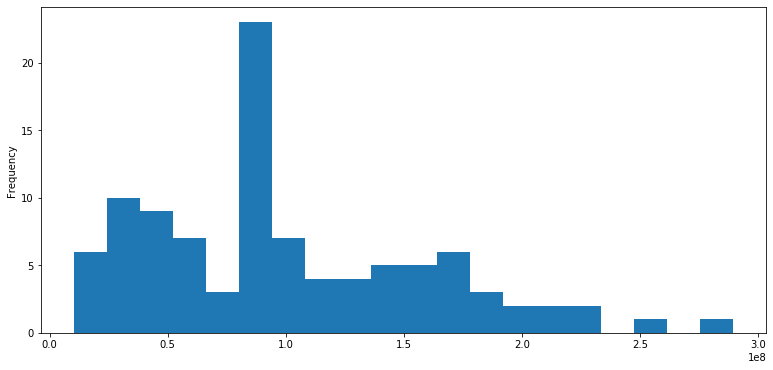

In [86]:
#Graphical Univariate Analysis for total session per user
df['Dur. (ms).1'].sample(100).plot.hist(bins=20, figsize=(13, 6))

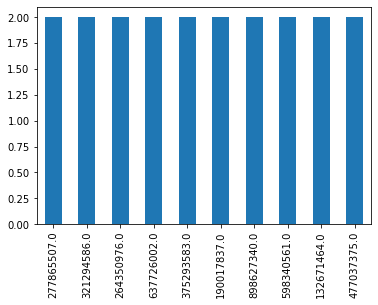

In [43]:
#Graphical Univariate Analysis for total session per user the total download (DL) and upload (UL) data
df['Total_downloads'].value_counts().head(10).plot.bar()

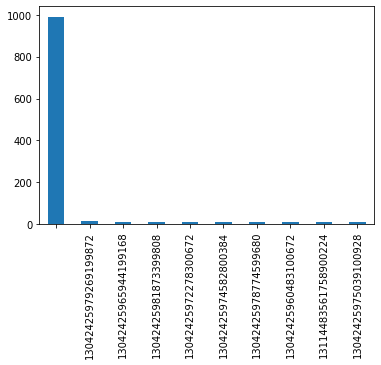

In [90]:
df['Bearer Id'].value_counts().head(10).plot.bar()

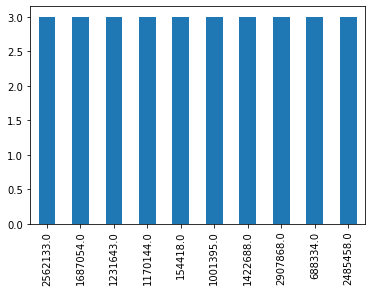

In [53]:
df['social Application'].value_counts().head(10).plot.bar()

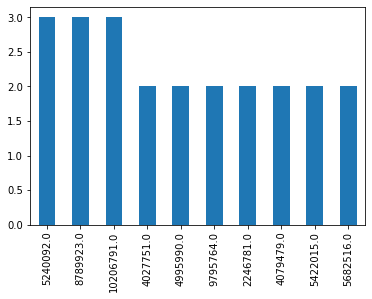

In [52]:
df['google Application'].value_counts().head(10).plot.bar()

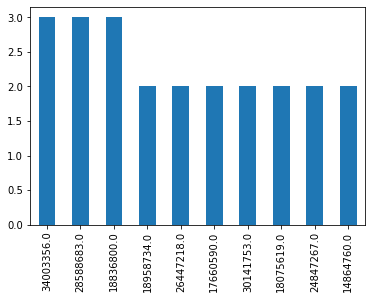

In [54]:
df['youtube Application'].value_counts().head(10).plot.bar()

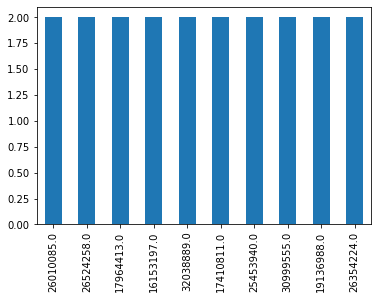

In [84]:
df['netflix Application'].value_counts().head(10).plot.bar()

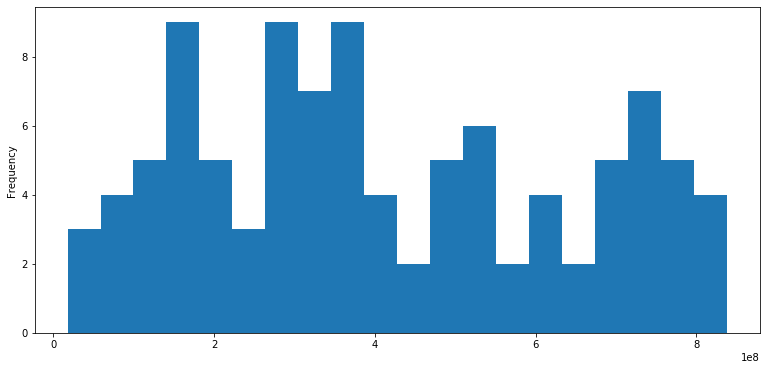

In [82]:
df['gaming Application'].sample(100).plot.hist(bins=20, figsize=(13, 6))

# Conducting a Non-Graphical Univariate Analysis 

In [58]:
df['Dur. (ms).1'].describe()

count    1.500000e+05
mean     1.046091e+08
std      8.103761e+07
min      7.142988e+06
25%      5.744079e+07
50%      8.639998e+07
75%      1.324308e+08
max      1.859336e+09
Name: Dur. (ms).1, dtype: float64

In [59]:
df['Total_downloads'].describe()

count    1.500000e+05
mean     4.957646e+08
std      2.443818e+08
min      2.895611e+07
25%      2.844759e+08
50%      4.968611e+08
75%      7.065059e+08
max      9.559848e+08
Name: Total_downloads, dtype: float64

In [60]:
df['Bearer Id'].describe()

count     150001
unique    134709
top             
freq         991
Name: Bearer Id, dtype: object

In [61]:
df['total_data_volume'].describe()

count    1.500010e+05
mean     1.828250e+06
std      1.035646e+06
min      1.563000e+03
25%      9.322180e+05
50%      1.826471e+06
75%      2.727487e+06
max      3.650861e+06
Name: total_data_volume, dtype: float64

In [62]:
df['social Application'].describe()

count    1.500010e+05
mean     1.828250e+06
std      1.035646e+06
min      1.563000e+03
25%      9.322180e+05
50%      1.826471e+06
75%      2.727487e+06
max      3.650861e+06
Name: social Application, dtype: float64

In [63]:
df['google Application'].describe()

count    1.500010e+05
mean     7.807295e+06
std      3.516420e+06
min      4.033000e+04
25%      4.943599e+06
50%      7.812835e+06
75%      1.068280e+07
max      1.552878e+07
Name: google Application, dtype: float64

In [64]:
df['email Application'].describe()

count    1.500010e+05
mean     2.259102e+06
std      1.071109e+06
min      8.359000e+03
25%      1.359344e+06
50%      2.263567e+06
75%      3.159818e+06
max      4.518036e+06
Name: email Application, dtype: float64

In [65]:
df['youtube Application'].describe()

count    1.500010e+05
mean     2.264348e+07
std      9.246800e+06
min      7.890300e+04
25%      1.599846e+07
50%      2.266177e+07
75%      2.929260e+07
max      4.519008e+07
Name: youtube Application, dtype: float64

In [66]:
df['netflix Application'].describe()

count    1.500010e+05
mean     2.262861e+07
std      9.260820e+06
min      9.843200e+04
25%      1.597946e+07
50%      2.263554e+07
75%      2.929044e+07
max      4.519815e+07
Name: netflix Application, dtype: float64

In [67]:
df['gaming Application'].describe()

count    1.500010e+05
mean     4.303331e+08
std      2.440199e+08
min      3.063580e+05
25%      2.187279e+08
50%      4.316150e+08
75%      6.414159e+08
max      8.592028e+08
Name: gaming Application, dtype: float64

# Bivariate Analysis showing relationships between each application and total downloads

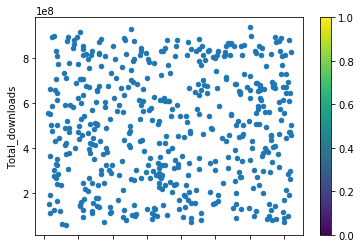

In [74]:
df.sample(500).plot.scatter(x='social Application', y='Total_downloads', colormap='viridis')

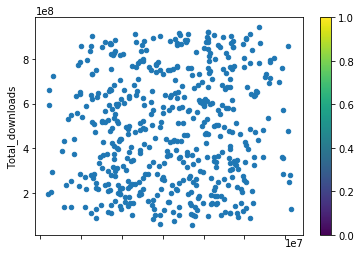

In [75]:
df.sample(500).plot.scatter(x='google Application', y='Total_downloads', colormap='viridis')

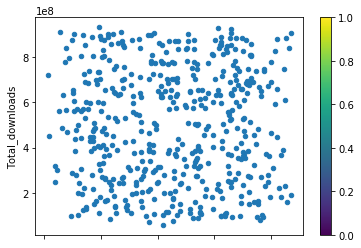

In [76]:
df.sample(500).plot.scatter(x='email Application', y='Total_downloads', colormap='viridis')

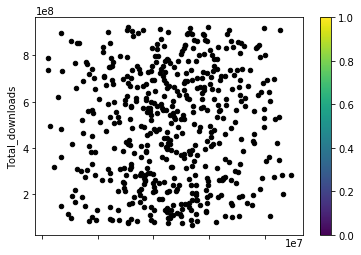

In [78]:
df.sample(500).plot.scatter(x='youtube Application', y='Total_downloads',c= 'black', colormap='viridis')

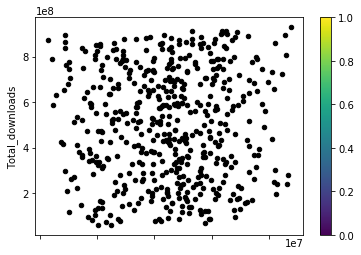

In [79]:
df.sample(500).plot.scatter(x='netflix Application', y='Total_downloads',c= 'black', colormap='viridis')

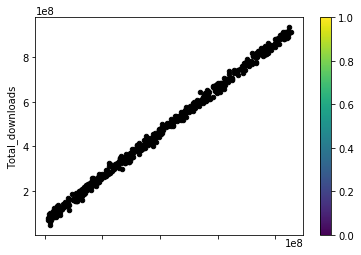

In [80]:
df.sample(500).plot.scatter(x='gaming Application', y='Total_downloads',c= 'black', colormap='viridis')

In [92]:
#matrix correlation
df['social Application'].corr(df['google Application'])

-0.0017082139338459314

In [93]:
df['email Application'].corr(df['youtube Application'])

-0.002918971213482336

In [94]:
df['netflix Application'].corr(df['gaming Application'])

-0.0031087454124693083

In [96]:
df[['social Application','google Application','email Application','youtube Application','netflix Application','gaming Application']].corr()

,social Application,google Application,email Application,youtube Application,netflix Application,gaming Application
social Application,1.000000,-0.001708,0.004032,0.000548,0.001013,0.001082
google Application,-0.001708,1.000000,-0.000412,0.002277,-0.001902,-0.000994
email Application,0.004032,-0.000412,1.000000,-0.002919,0.001029,-0.000644
youtube Application,0.000548,0.002277,-0.002919,1.000000,0.002882,-0.002999
netflix Application,0.001013,-0.001902,0.001029,0.002882,1.000000,-0.003109
gaming Application,0.001082,-0.000994,-0.000644,-0.002999,-0.003109,1.000000
